# Quick Analysis of MODIS EVI dataset

In [5]:
import numpy as np
import pandas as pd 
import xarray as xr

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds = xr.open_dataset("../data/exp_pro/MODIS_EVI_conus.nc", engine="h5netcdf")
ds

<xarray.Dataset>
Dimensions:  (time: 72, lon: 1400, lat: 880)
Coordinates:
  * lat      (lat) float64 61.97 61.92 61.88 61.83 ... 18.17 18.12 18.08 18.02
  * lon      (lon) float64 -130.0 -129.9 -129.9 -129.8 ... -60.12 -60.07 -60.02
  * time     (time) datetime64[ns] 2015-01-01 2015-02-01 ... 2020-12-01
Data variables:
    evi      (time, lon, lat) float32 ...

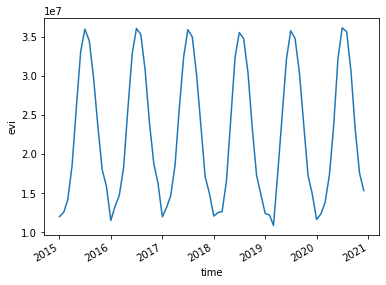

In [9]:
ds["evi"].mean(dim=["lon", "lat"]).plot()